# **Гипотеза:**

# **Предобработка данных:**

# Обзор датасета

[Cars](https://ai.stanford.edu/~jkrause/cars/car_dataset.html)

Набор данных Cars содержит 16185 изображений 196 классов автомобилей. Данные разделены на 8144 тренировочных изображений и 8041 тестовых изображений, где каждый класс разделен примерно в пропорции 50-50. Классы обычно находятся на уровне Make, Model, Year. Например: 2012 Tesla Model S или 2012 BMW M3 coupe.



Комплект разработчика, включающий метки классов для обучающих изображений и ограничивающие рамки для всех изображений, можно скачать [здесь](https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz)

# Подгружаю данные с гугл диска

In [1]:
from google.colab import drive
import os
import matplotlib.pyplot as plt
import cv2
from scipy import io

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


# Смотрим несколько картинок из train

In [ ]:
# список всех картинок в train
train_pics = os.listdir('drive/My Drive/Cars/train')

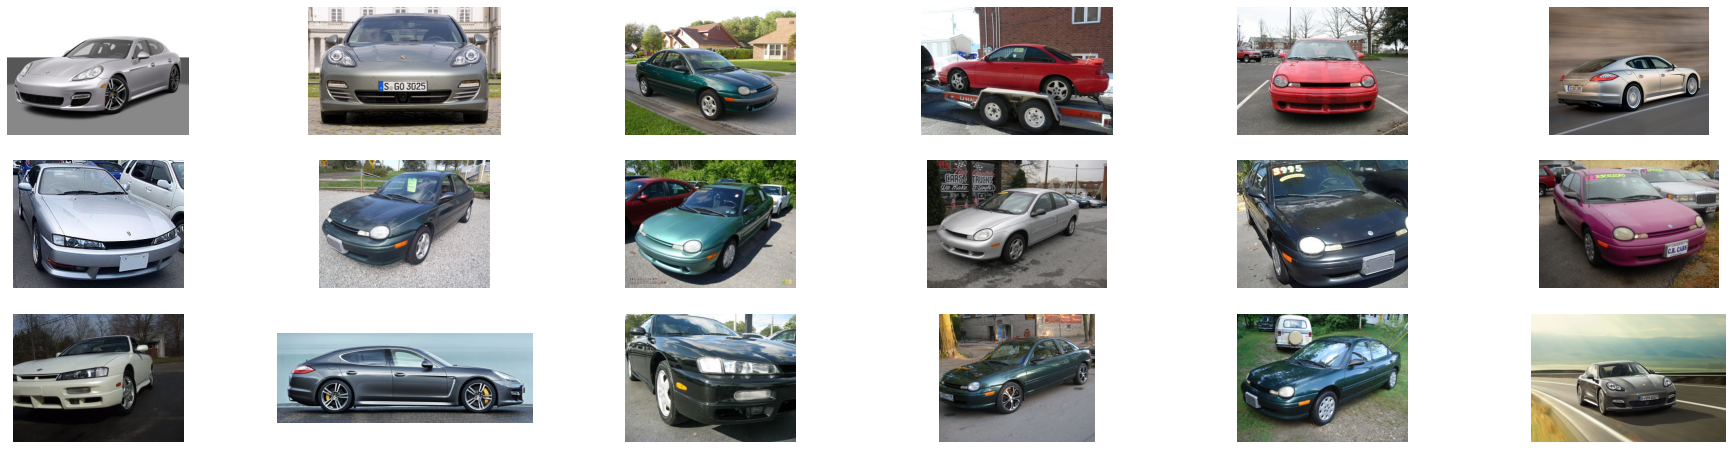

In [ ]:
pic_box = plt.figure(figsize=(32,8))

for i, picture in enumerate(train_pics[:18]):
    # считываем изображение в picture
    picture = cv2.imread('drive/My Drive/Cars/train/' + picture)
    # конвертируем BGR изображение в RGB
    picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
    # добавляем ячейку в pix_box для вывода текущего изображения
    pic_box.add_subplot(3,6,i+1)
    plt.imshow(picture)
    # отключаем отображение осей
    plt.axis('off')
# выводим все созданные фигуры на экран
plt.show()   

# Смотрим несколько картинок из test

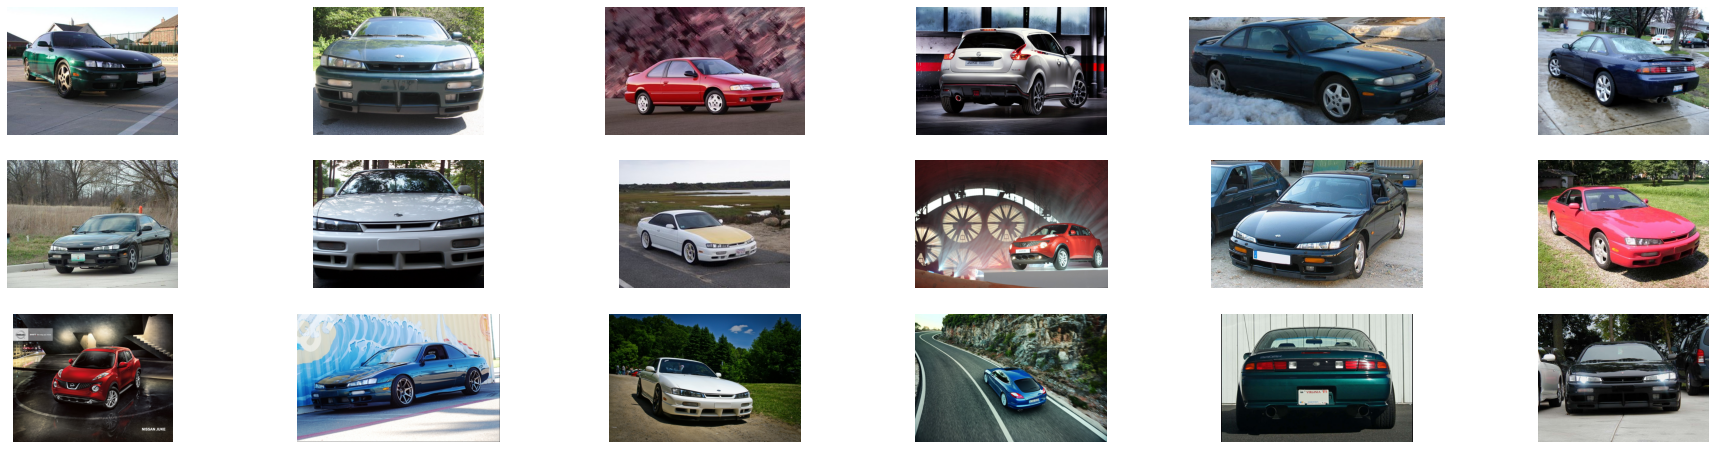

In [ ]:
# список всех картинок в test
test_pics = os.listdir('drive/My Drive/Cars/test')

pic_box = plt.figure(figsize=(32,8))

for i, picture in enumerate(test_pics[:18]):
    # считываем изображение в picture
    picture = cv2.imread('drive/My Drive/Cars/test/' +picture)
    # конвертируем BGR изображение в RGB
    picture = cv2.cvtColor(picture, cv2.COLOR_BGR2RGB)
    # добавляем ячейку в pix_box для вывода текущего изображения
    pic_box.add_subplot(3,6,i+1)
    plt.imshow(picture)
    # отключаем отображение осей
    plt.axis('off')
# выводим все созданные фигуры на экран
plt.show() 

# Достаём имена классов

**-cars_meta.mat:**
  
Содержит массив ячеек с именами классов, по одному для каждого класса

In [3]:
cars_annos = io.loadmat('drive/My Drive/Cars/cars_meta.mat')

class_names = []
for names in cars_annos['class_names'][0]:
  class_names.append(names[0])

print("Всего классов:", len(class_names), class_names)

Всего классов: 196 ['AM General Hummer SUV 2000', 'Acura RL Sedan 2012', 'Acura TL Sedan 2012', 'Acura TL Type-S 2008', 'Acura TSX Sedan 2012', 'Acura Integra Type R 2001', 'Acura ZDX Hatchback 2012', 'Aston Martin V8 Vantage Convertible 2012', 'Aston Martin V8 Vantage Coupe 2012', 'Aston Martin Virage Convertible 2012', 'Aston Martin Virage Coupe 2012', 'Audi RS 4 Convertible 2008', 'Audi A5 Coupe 2012', 'Audi TTS Coupe 2012', 'Audi R8 Coupe 2012', 'Audi V8 Sedan 1994', 'Audi 100 Sedan 1994', 'Audi 100 Wagon 1994', 'Audi TT Hatchback 2011', 'Audi S6 Sedan 2011', 'Audi S5 Convertible 2012', 'Audi S5 Coupe 2012', 'Audi S4 Sedan 2012', 'Audi S4 Sedan 2007', 'Audi TT RS Coupe 2012', 'BMW ActiveHybrid 5 Sedan 2012', 'BMW 1 Series Convertible 2012', 'BMW 1 Series Coupe 2012', 'BMW 3 Series Sedan 2012', 'BMW 3 Series Wagon 2012', 'BMW 6 Series Convertible 2007', 'BMW X5 SUV 2007', 'BMW X6 SUV 2012', 'BMW M3 Coupe 2012', 'BMW M5 Sedan 2010', 'BMW M6 Convertible 2010', 'BMW X3 SUV 2012', 'BMW 

Знак дроби убираю, чтобы не было потом проблем с путями в папках, знак / есть только в одном имени класса

In [4]:
class_names.index('Ram C/V Cargo Van Minivan 2012')

173

In [5]:
class_names[173] = 'Ram CV Cargo Van Minivan 2012'

# Разделяю картинки из папки train (они там в кучу свалены) по подпапкам с именами классов (всё это теперь в папке train_with_classes). Чтобы потом ImageDataGenerator радовался

**-cars_train_annos.mat:**

 Содержит переменную 'annotations', которая представляет собой структурный массив длины num_images и где каждый элемент имеет поля:

 bbox_x1: Минимальное значение x ограничивающего прямоугольника, в пикселях

bbox_x2: Максимальное значение x ограничивающего прямоугольника, в пикселях

bbox_y1: Минимальное значение y ограничивающего прямоугольника, в пикселях

bbox_y2: Максимальное значение y ограничивающего прямоугольника, в пикселях

класс: Интегральный идентификатор класса, которому изображение принадлежит.

fname: имя файла изображения в папке изображений.


**-cars_test_annos.mat:**
 Тот же формат, что и 'cars_train_annos.mat', за исключением того, что класс не указан.

In [ ]:
os.mkdir('drive/My Drive/Cars/train_with_classes')

In [ ]:
# создаю папки
for class_name in class_names:
  os.mkdir('drive/My Drive/Cars/train_with_classes/' + class_name)

In [ ]:
cars_train_annos = io.loadmat('drive/My Drive/Cars/cars_train_annos.mat')

In [ ]:
# cars_train_annos['annotation'] содержит 4 координаты ограничивающей рамки, метку класса и имя картинки
# dtype=[('bbox_x1', 'O'), ('bbox_y1', 'O'), ('bbox_x2', 'O'), ('bbox_y2', 'O'), ('class', 'O'), ('fname', 'O')])


for annotation in cars_train_annos['annotations'][0]:
  # имя картинки
  path = annotation[5][0]
  # класс картинки
  class_ = annotation[4][0][0] - 1
  # сохраняем картинку в папку с этим классом
  img = cv2.imread('drive/My Drive/Cars/train/'+ path)
  class_name = class_names[class_]
  cv2.imwrite('drive/My Drive/Cars/train_with_classes/' + class_name + '/' + path, img)    

# Смотрим количество изображений каждого класса в train_with_classes

In [ ]:
import fnmatch

# чтобы проверить что ничего не потеряли при переносе из train, должно быть 8144
cnt_train = 0

gist = {}

for dir in class_names:
  cnt = len(fnmatch.filter(os.listdir('drive/My Drive/Cars/train_with_classes/'+dir), '*.jpg'))
  cnt_train += cnt
  gist[dir] = cnt
  print('Класс ', dir, 'содержит изображений: ', cnt)

print('Всего в папке train_with_classes ', cnt_train, 'изображений')

Класс  AM General Hummer SUV 2000 содержит изображений:  45
Класс  Acura RL Sedan 2012 содержит изображений:  32
Класс  Acura TL Sedan 2012 содержит изображений:  43
Класс  Acura TL Type-S 2008 содержит изображений:  42
Класс  Acura TSX Sedan 2012 содержит изображений:  41
Класс  Acura Integra Type R 2001 содержит изображений:  45
Класс  Acura ZDX Hatchback 2012 содержит изображений:  39
Класс  Aston Martin V8 Vantage Convertible 2012 содержит изображений:  45
Класс  Aston Martin V8 Vantage Coupe 2012 содержит изображений:  41
Класс  Aston Martin Virage Convertible 2012 содержит изображений:  33
Класс  Aston Martin Virage Coupe 2012 содержит изображений:  38
Класс  Audi RS 4 Convertible 2008 содержит изображений:  37
Класс  Audi A5 Coupe 2012 содержит изображений:  41
Класс  Audi TTS Coupe 2012 содержит изображений:  43
Класс  Audi R8 Coupe 2012 содержит изображений:  43
Класс  Audi V8 Sedan 1994 содержит изображений:  44
Класс  Audi 100 Sedan 1994 содержит изображений:  41
Класс  Audi

# **Аугментация**

Некоторые из стандартных методов аугментации включают в себя: 

* Поворот изображения по часовой стрелке или против часовой стрелки на заданный угол 
* Переворот изображения по вертикали или горизонтали 
* Регулировка яркости путем увеличения или уменьшения яркости изображения
* Добавление шума путем применения эффектов размытия (например, размытие по Гауссу) 
*Масштабирование изображения внутрь или наружу для разных степеней масштабирования

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import math

In [11]:
def augmentation(dir_with_pic, n, aug):
  pics = os.listdir(dir_with_pic)
  cnt = math.ceil(n / len(pics))
  
  for pic in pics:
    image = load_img(dir_with_pic + '/' + pic)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    total = 0

    imageGen = aug.flow(image, batch_size=1, save_to_dir=dir_with_pic, save_prefix="aug_image", save_format="jpg")

    for image in imageGen:
      total += 1
      if total == cnt:
        break

In [12]:
aug = ImageDataGenerator(
  # поворот
	rotation_range=30, 
  # диапазон сдвига яркости
  brightness_range=[0.8, 1.2],
  # масштабирование
	zoom_range=0.15,
  # сдвиг по х
	width_shift_range=0.2,
  # сдвиг по у
	height_shift_range=0.2,
  # сдвиг против часовой стрелки
	shear_range=0.15,
  # отражение по горизонтали
	horizontal_flip=True,
  # заполнение пикселей вне изображения из ближайших к краю изображения
	fill_mode="nearest")

for d in class_names[192:]:
  augmentation('drive/My Drive/Cars/train_with_classes/' + d, 1000, aug)

In [13]:
import fnmatch

cnt_train = 0

for dir in class_names:
  cnt = len(fnmatch.filter(os.listdir('drive/My Drive/Cars/train_with_classes/'+dir), '*.jpg'))
  cnt_train += cnt
  print('Класс ', dir, 'содержит изображений: ', cnt)

print('Всего в папке train_with_classes ', cnt_train, 'изображений')

Класс  AM General Hummer SUV 2000 содержит изображений:  1025
Класс  Acura RL Sedan 2012 содержит изображений:  1017
Класс  Acura TL Sedan 2012 содержит изображений:  1017
Класс  Acura TL Type-S 2008 содержит изображений:  1009
Класс  Acura TSX Sedan 2012 содержит изображений:  1022
Класс  Acura Integra Type R 2001 содержит изображений:  1025
Класс  Acura ZDX Hatchback 2012 содержит изображений:  1006
Класс  Aston Martin V8 Vantage Convertible 2012 содержит изображений:  1033
Класс  Aston Martin V8 Vantage Coupe 2012 содержит изображений:  1020
Класс  Aston Martin Virage Convertible 2012 содержит изображений:  1011
Класс  Aston Martin Virage Coupe 2012 содержит изображений:  1019
Класс  Audi RS 4 Convertible 2008 содержит изображений:  1029
Класс  Audi A5 Coupe 2012 содержит изображений:  1011
Класс  Audi TTS Coupe 2012 содержит изображений:  1023
Класс  Audi R8 Coupe 2012 содержит изображений:  1028
Класс  Audi V8 Sedan 1994 содержит изображений:  1000
Класс  Audi 100 Sedan 1994 содер